# A Quick Tutorial of Taking Numerical Derivative of Noisy Data with PyNumDiff

This notebook walks through each of the methods implemented in PyNumDiff.

### Notations:
  * dt: (float) time step
  * x: (np.array with length N) the noisy time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is accessible when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is accessible when the data is simulated, and used for plotting purposes only)

In [1]:
import os, sys

# local import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pynumdiff
from pynumdiff.utils import simulate, evaluate

## 0. Simulate synthetic data

### PyNumDiff comes with 6 different toy problems:
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* linear_autonomous: (linear) linear time invariant system: dx/dt = Ax  
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_cruise_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [2]:
# noise is generated using np.random, e.g. 'normal', 'uniform', 'poisson'
# noise_type and noise_parameters should be compatible with np.random functions 
noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
duration = 4

x, x_truth, dxdt_truth = simulate.pi_cruise_control(duration=duration, dt=dt, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

## 1. Finite Difference

### 1.1 FD: First Order

RMS error in velocity:  14.311286435729324
Error correlation:  0.0002292291173199571


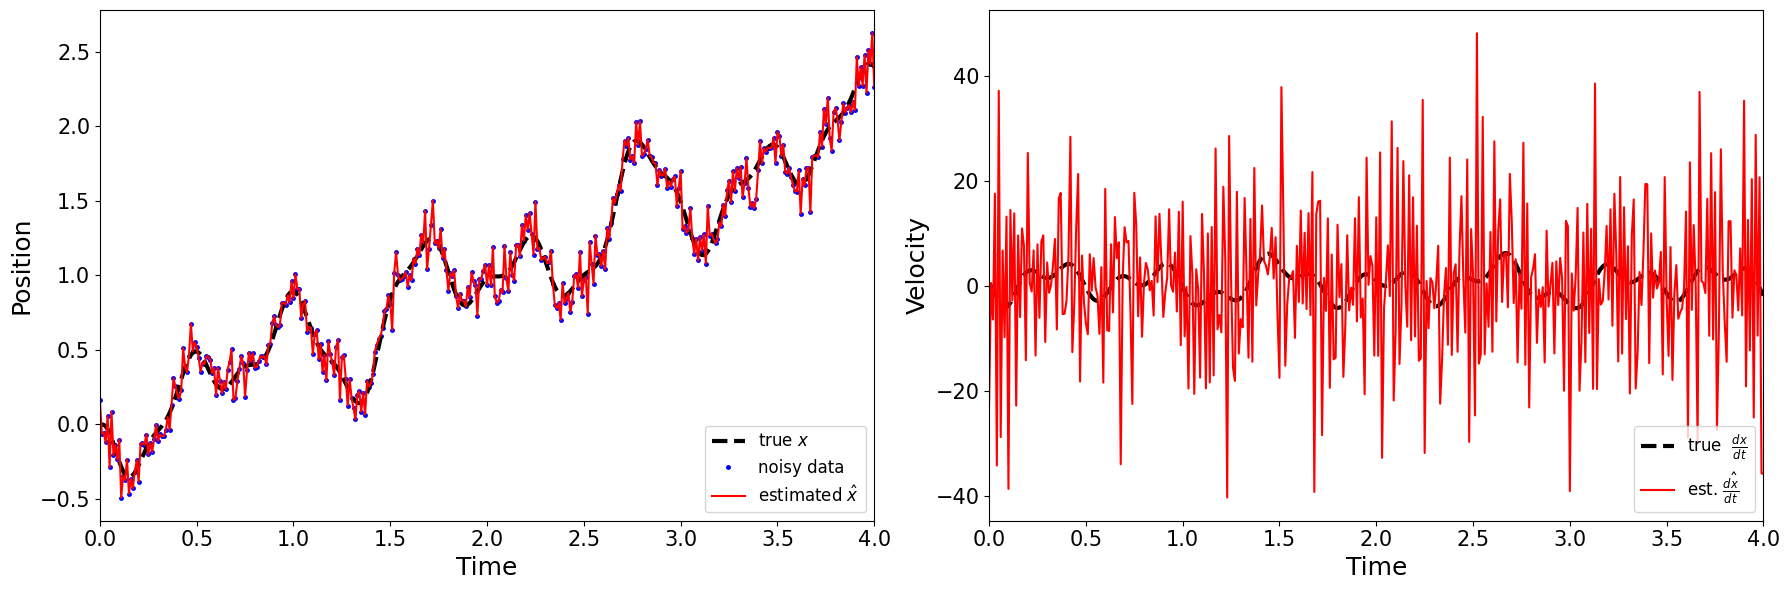

In [3]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.2 FD: Iterated First Order

Note this one causes a nasty shift, because the FD formula isn't centered.

RMS error in velocity:  6.81494138683291
Error correlation:  0.1557372179336233


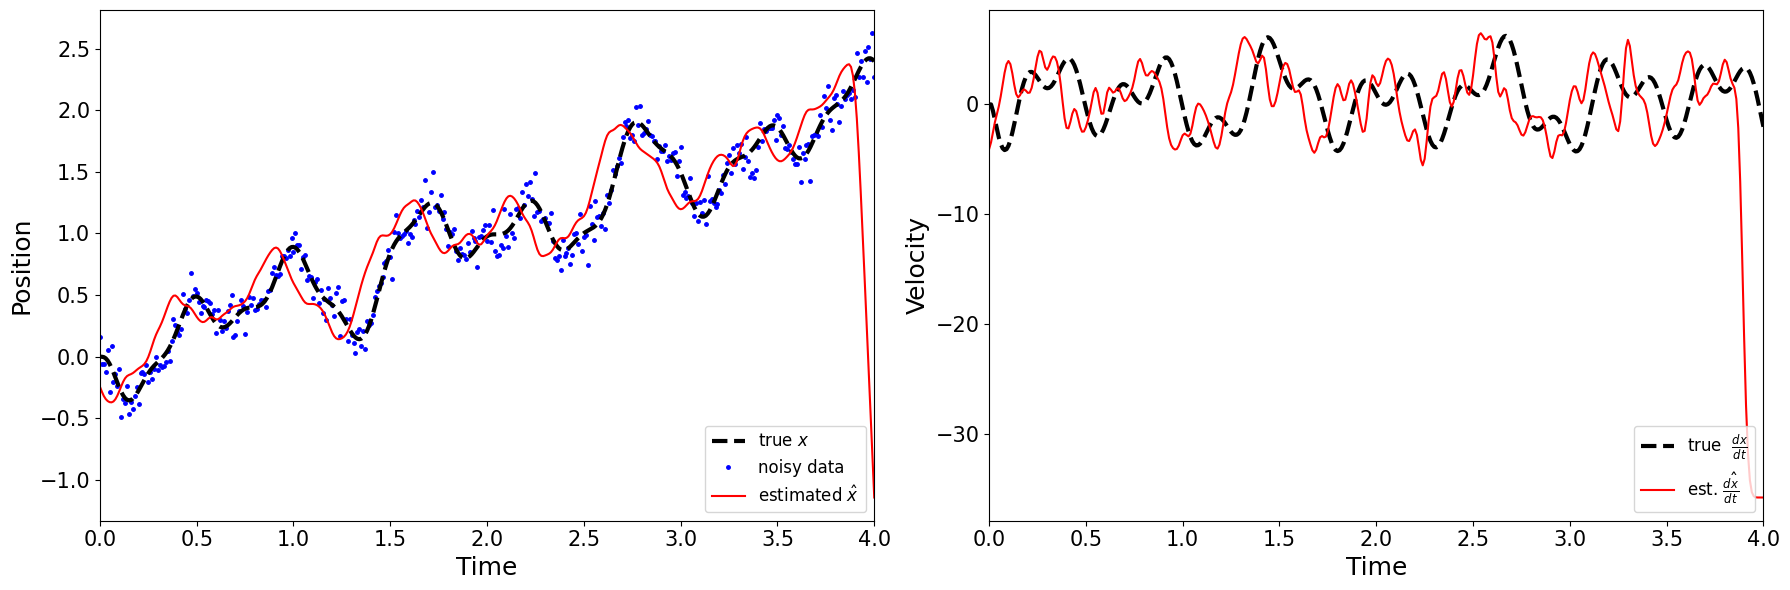

In [4]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, num_iterations=20)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 FD: Second Order

Note the extra blowup at the edges. This is because the FD formulas for the edges have large constants in the numerator, which amplify noise.

RMS error in velocity:  7.643954385214391
Error correlation:  0.0012610474551761064


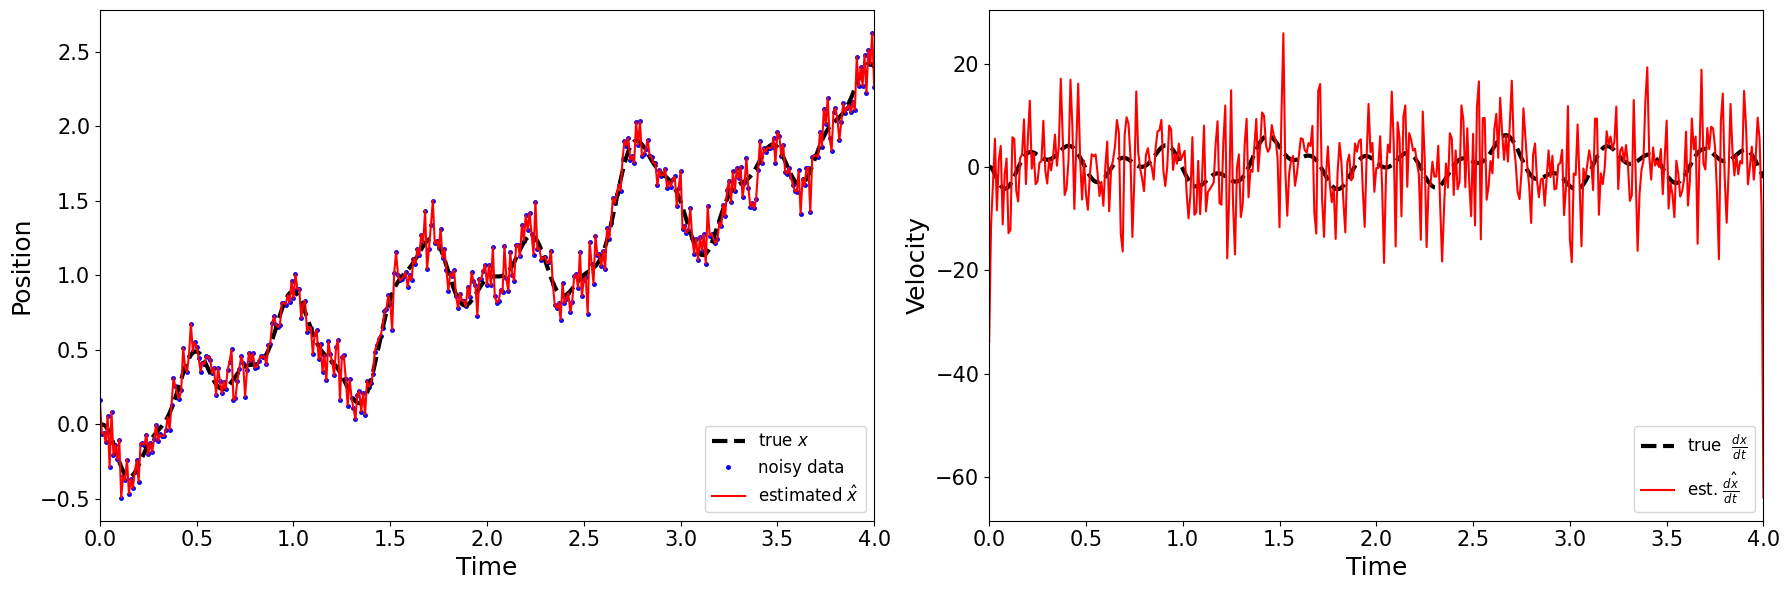

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.4 FD: Iterated Second Order

RMS error in velocity:  1.163696961752889
Error correlation:  0.21592276670274074


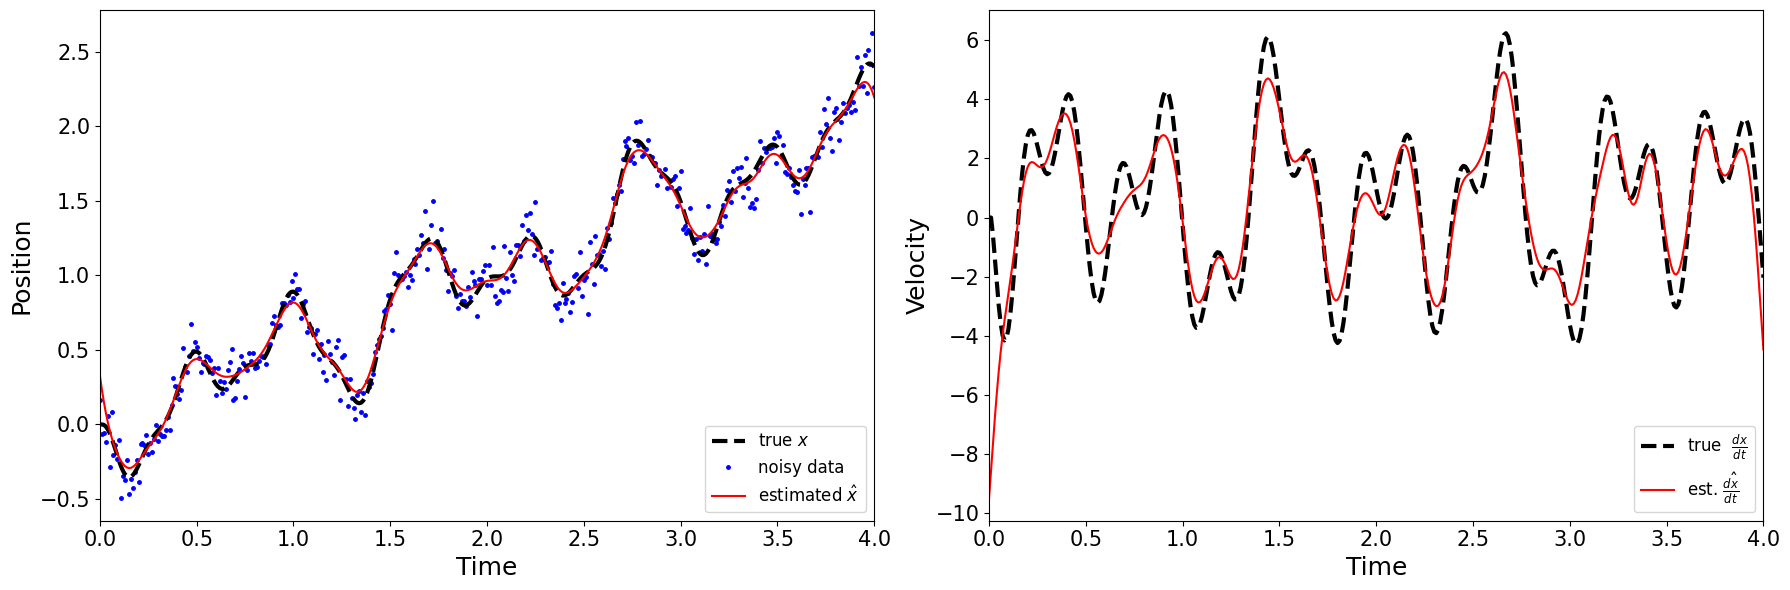

In [6]:
x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(x, dt, num_iterations=50)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.5 FD: Fourth Order

Note the extra blowup at the edges. This is because the FD formulas for the edges have large constants in the numerator, which amplify noise.

RMS error in velocity:  11.560466091915483
Error correlation:  0.0012911919937545482


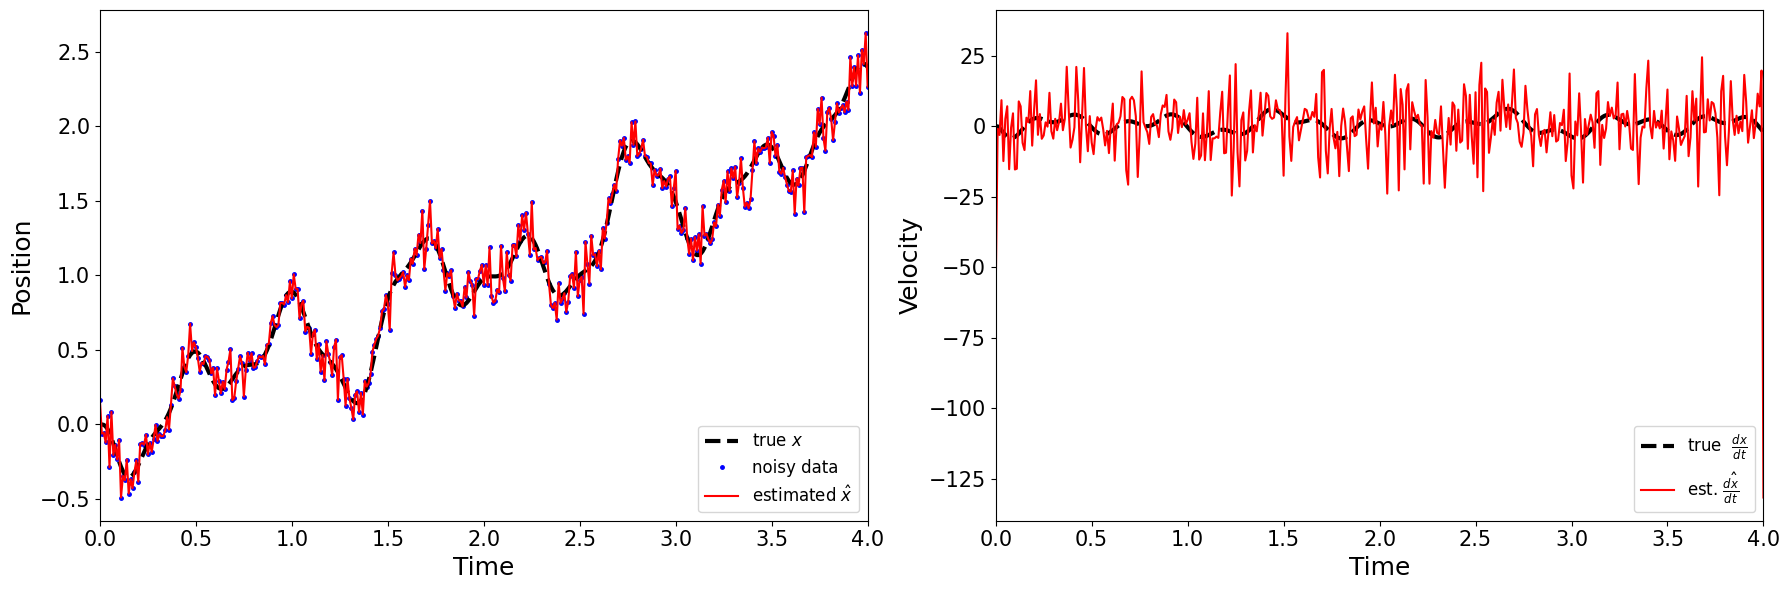

In [7]:
x_hat, dxdt_hat = pynumdiff.finite_difference.fourth_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.6 FD: Iterated Fourth Order

RMS error in velocity:  0.75636175258858
Error correlation:  0.06384224725565774


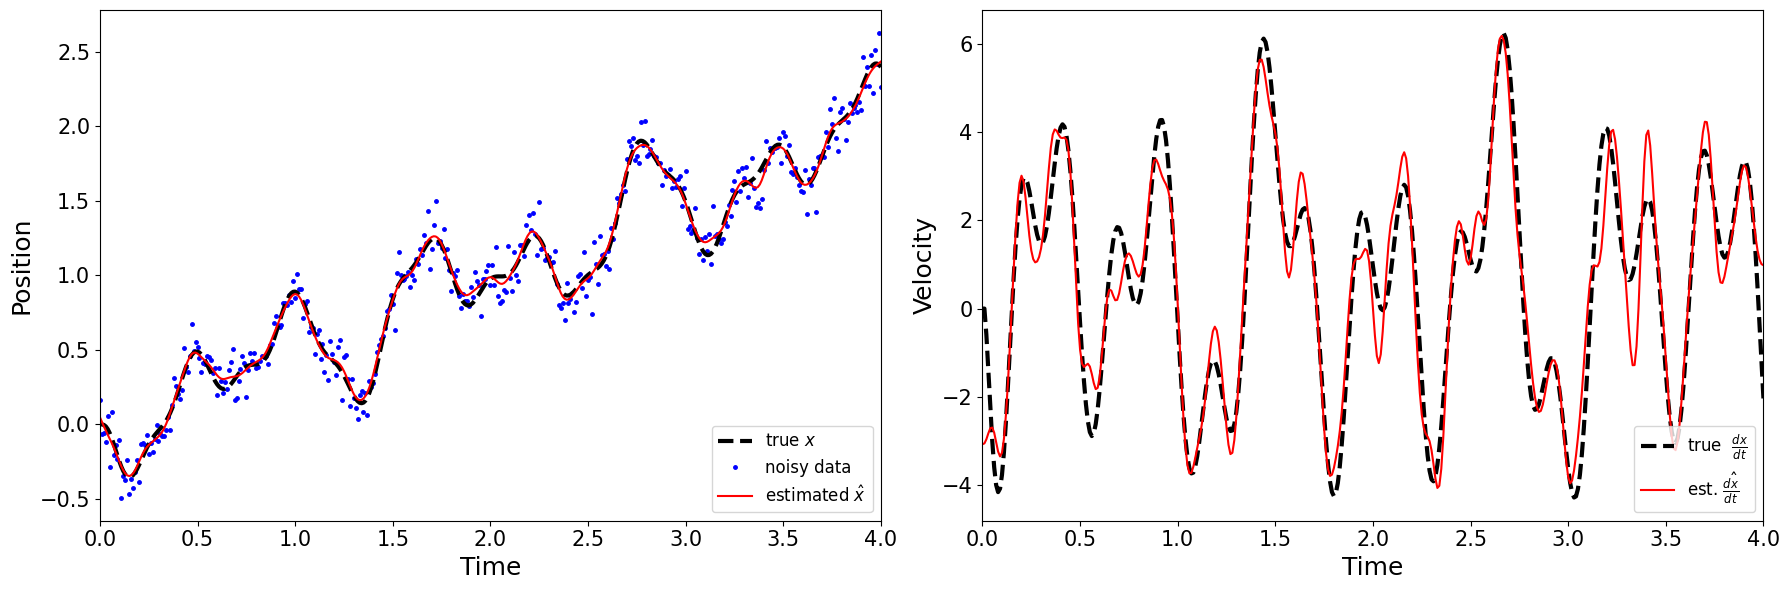

In [8]:
x_hat, dxdt_hat = pynumdiff.finite_difference.fourth_order(x, dt, num_iterations=50)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

In [9]:

# _, dxdt_hat1 = pynumdiff.finite_difference.second_order(x, dt, num_iterations=30)
# _, dxdt_hat2 = pynumdiff.finite_difference.fourth_order(x, dt, num_iterations=30)
# _, dxdt_hat3 = pynumdiff.finite_difference.fourth_order(x, dt, num_iterations=70)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'second_order; num_iterations=30',
#                          dxdt_hat2, 'fourth_order; num_iterations=30',
#                          dxdt_hat3, 'fourth_order; num_iterations=70')

## 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

RMS error in velocity:  1.8262250704853433
Error correlation:  0.2104358532168965


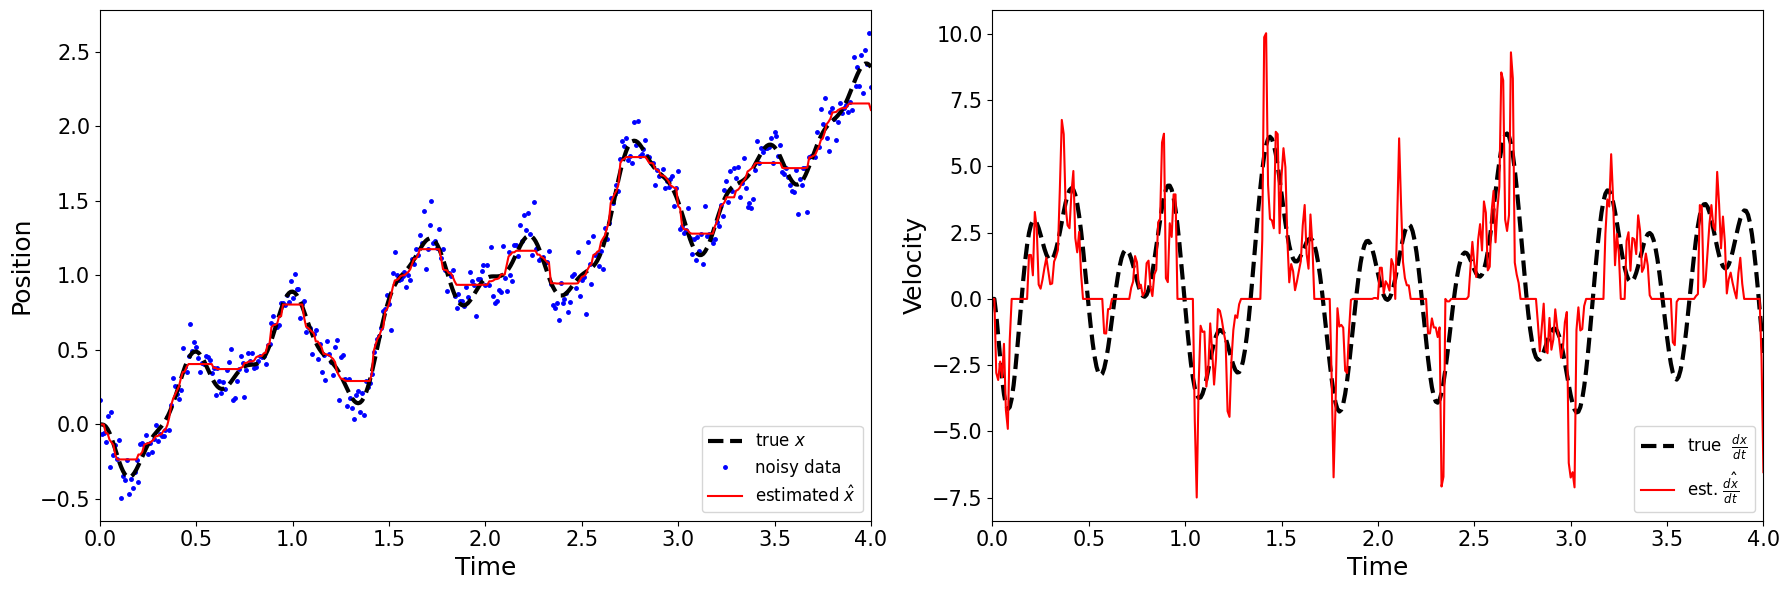

In [10]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, window_size=20, num_iterations=4)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.smooth_finite_difference.mediandiff(x, dt, window_size=20, num_iterations=1)
# _, dxdt_hat2 = pynumdiff.smooth_finite_difference.mediandiff(x, dt, window_size=20, num_iterations=10)
# _, dxdt_hat3 = pynumdiff.smooth_finite_difference.mediandiff(x, dt, window_size=30, num_iterations=10)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
#                          dxdt_hat2, 'window_size=10, num_iterations=3',
#                          dxdt_hat3, 'window_size=15, num_iterations=3')

### 2.2 Smooth Finite Difference: Mean smoothing

RMS error in velocity:  0.9392208896320581
Error correlation:  0.5283264983012727


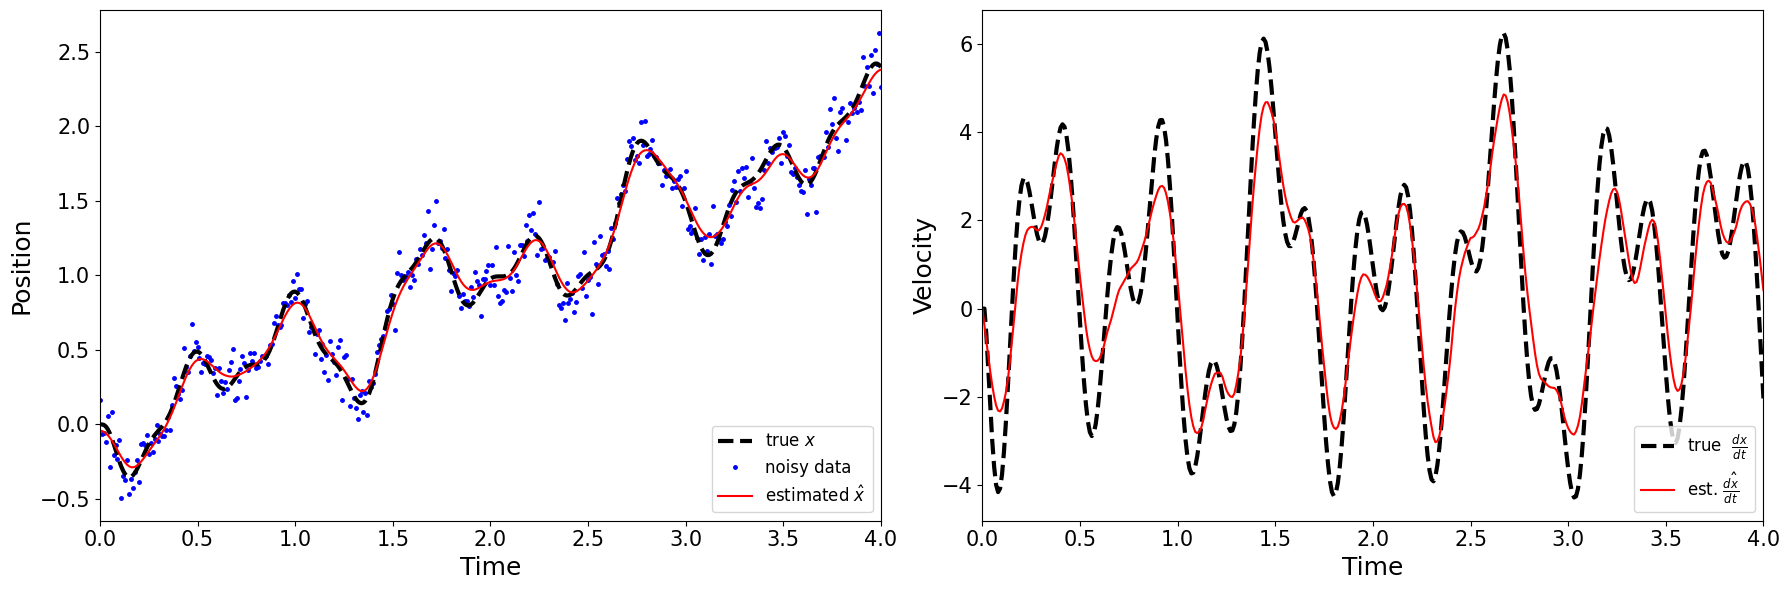

In [11]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=3)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=1)
# _, dxdt_hat2 = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=3)
# _, dxdt_hat3 = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=15, num_iterations=3)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
#                          dxdt_hat2, 'window_size=10, num_iterations=3',
#                          dxdt_hat3, 'window_size=15, num_iterations=3')

### 2.3 Smooth Finite Difference: Gaussian smoothing

RMS error in velocity:  0.6456841747296548
Error correlation:  0.23960833068050716


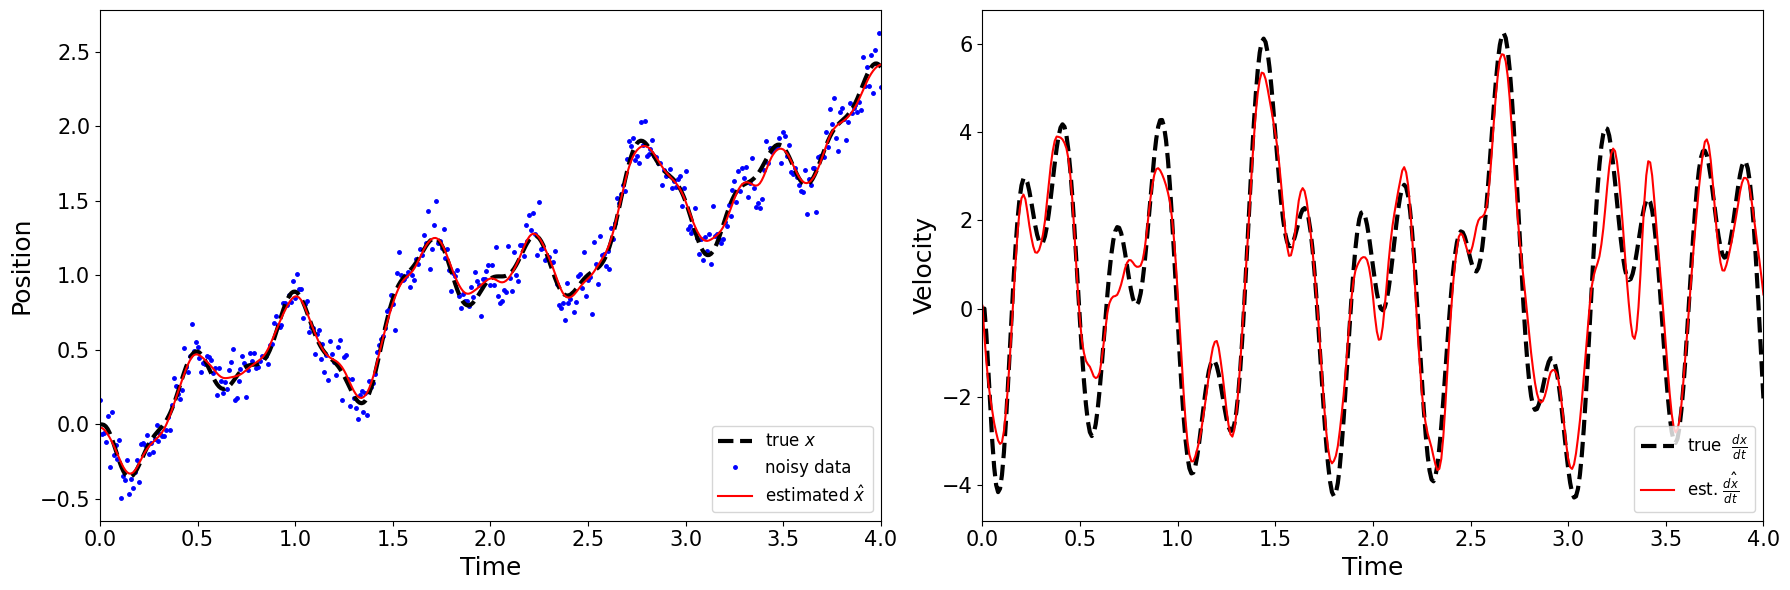

In [12]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=20)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=10, num_iterations=1)
# _, dxdt_hat2 = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=10, num_iterations=3)
# _, dxdt_hat3 = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=15, num_iterations=3)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
#                          dxdt_hat2, 'window_size=10, num_iterations=3',
#                          dxdt_hat3, 'window_size=15, num_iterations=3')

### 2.4 Smooth Finite Difference: Friedrichs smoothing

RMS error in velocity:  1.244128487047342
Error correlation:  0.0010635966774258097


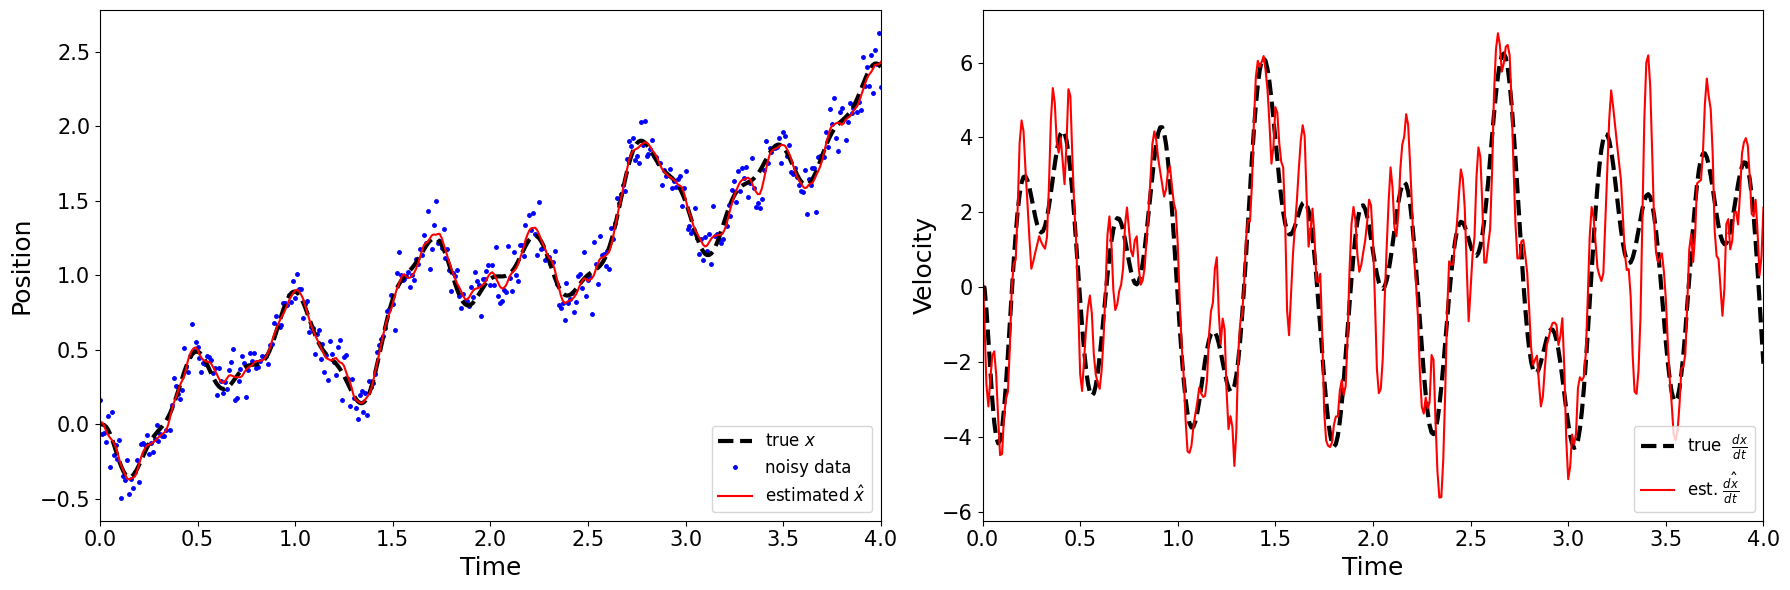

In [13]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10, num_iterations=1)
# _, dxdt_hat2 = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10, num_iterations=3)
# _, dxdt_hat3 = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=15, num_iterations=3)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
#                          dxdt_hat2, 'window_size=10, num_iterations=3',
#                          dxdt_hat3, 'window_size=15, num_iterations=3')

### 2.5 Smooth Finite Difference: Butterworth smoothing

RMS error in velocity:  0.7586871908288048
Error correlation:  0.07372647979776914


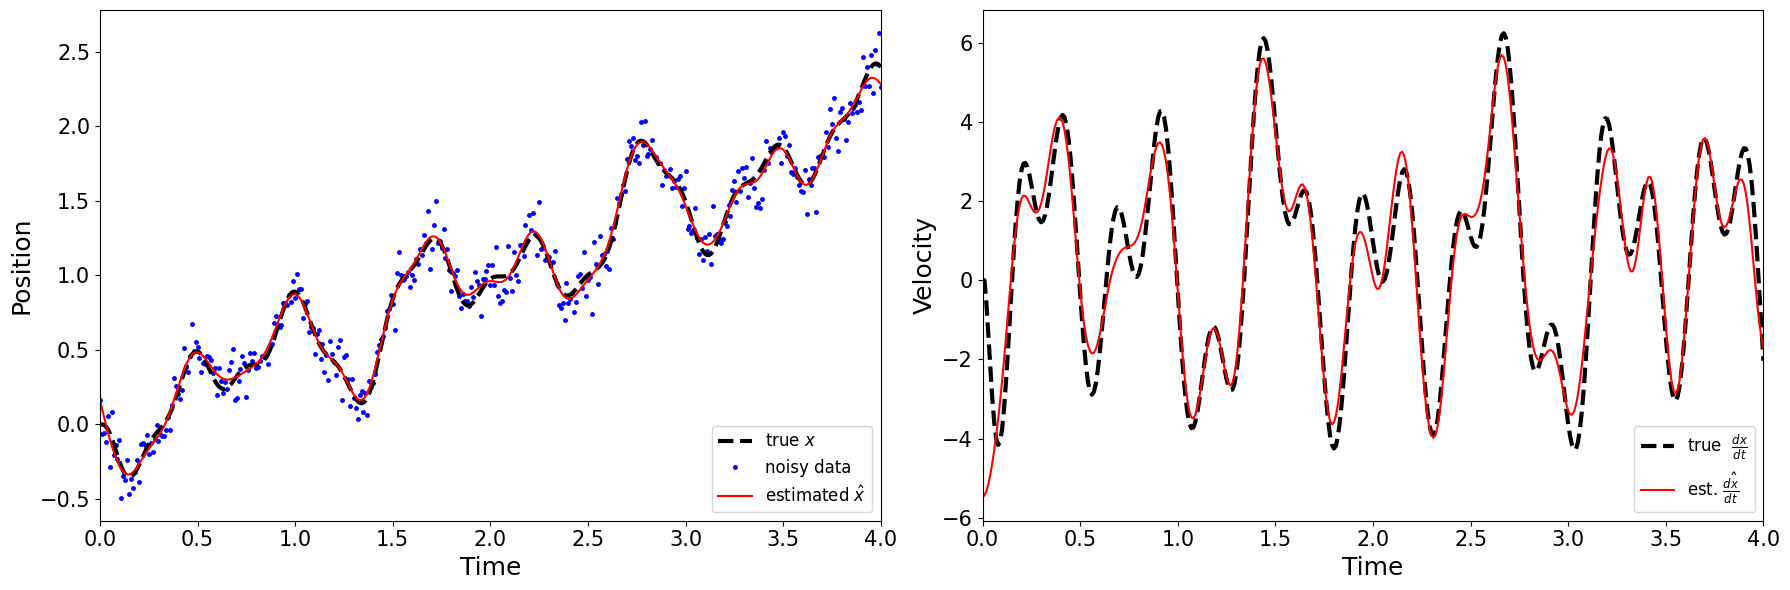

In [14]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=3, cutoff_freq=0.09)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=2, cutoff_freq=0.1)
# _, dxdt_hat2 = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=4, cutoff_freq=0.1)
# _, dxdt_hat3 = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=4, cutoff_freq=0.25)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'filter_order=2, cutoff_freq=0.15',
#                          dxdt_hat2, 'filter_order=4, cutoff_freq=0.15',
#                          dxdt_hat3, 'filter_order=4, cutoff_freq=0.25')

### 2.6 Smooth Finite Difference: Spline smoothing

RMS error in velocity:  1.0263038613344047
Error correlation:  0.044537325740607626


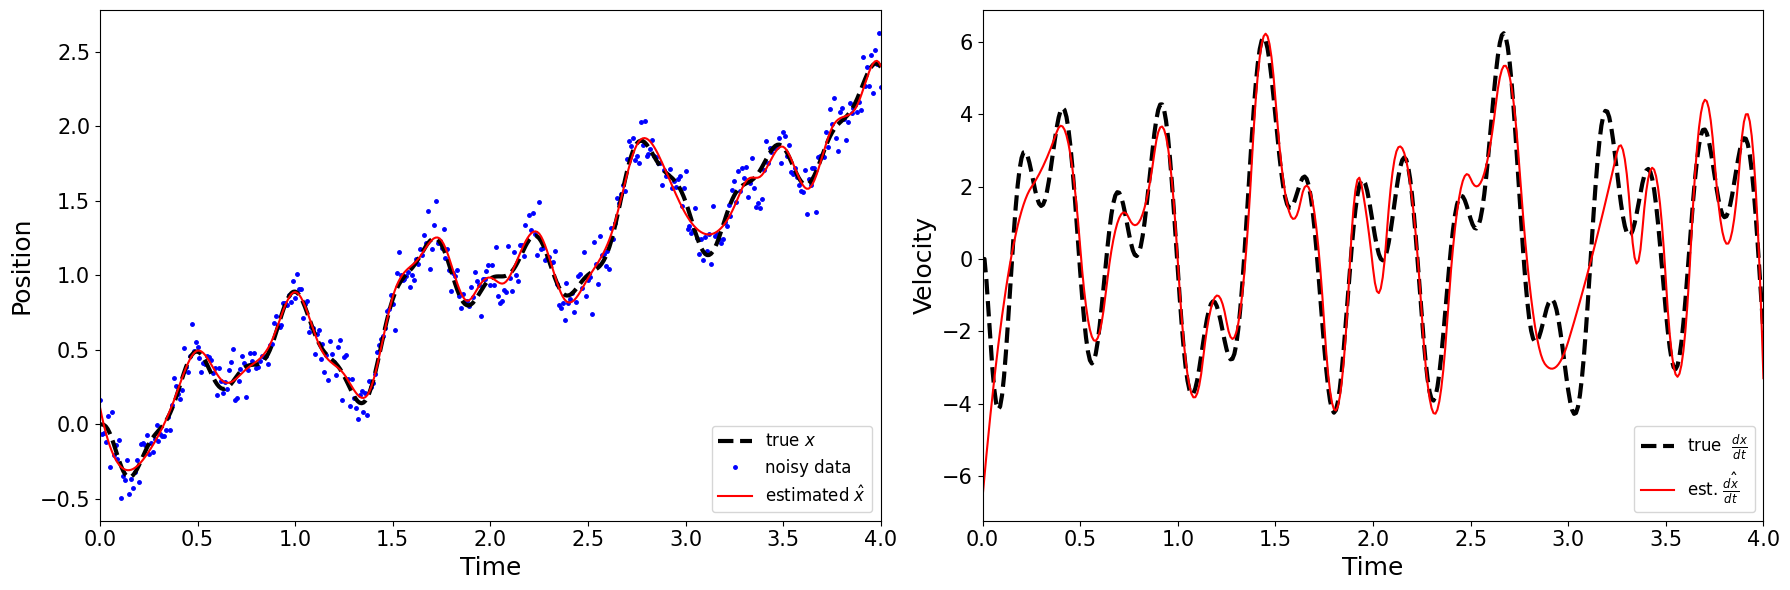

In [15]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, order=3, s=0.6, num_iterations=5)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.smooth_finite_difference.splinediff(x, dt, order=2, s=4, num_iterations=1)
# _, dxdt_hat2 = pynumdiff.smooth_finite_difference.splinediff(x, dt, order=3, s=0.55, num_iterations=5)
# _, dxdt_hat3 = pynumdiff.smooth_finite_difference.splinediff(x, dt, order=3, s=0.75, num_iterations=5)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'order=2, s=4, num_iterations=1',
#                          dxdt_hat2, 'order=3, s=0.55, num_iterations=5',
#                          dxdt_hat3, 'order=3, s=0.75, num_iterations=5')

## 3. Total Variation Regularization

### 3.1 Iterative Total Variation Regularization (regularized velocity)

RMS error in velocity:  0.894963866231348
Error correlation:  0.0063432820854903696


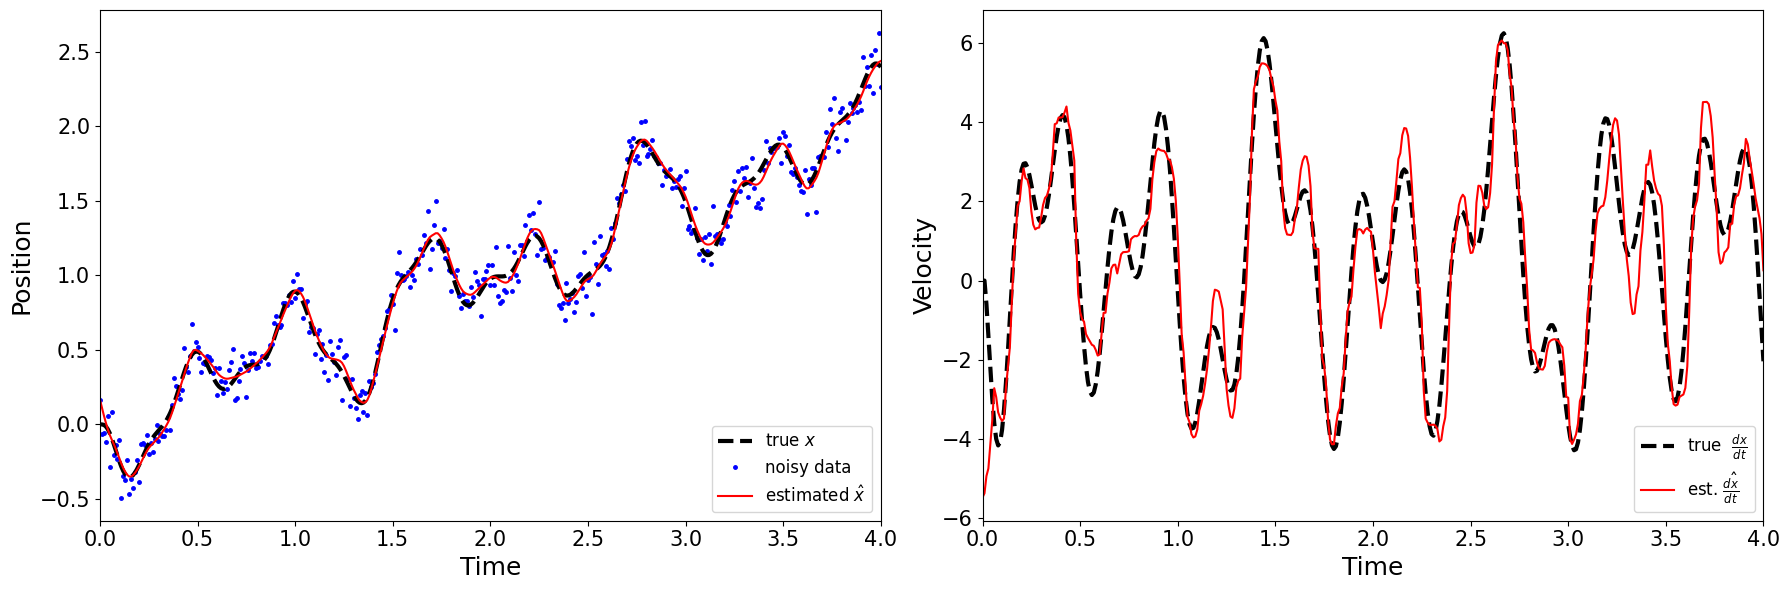

In [16]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, num_iterations=1, gamma=0.001)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Convex Total Variation Regularization: regularize velocity

RMS error in velocity:  1.0170777785664398
Error correlation:  0.007129580064882839


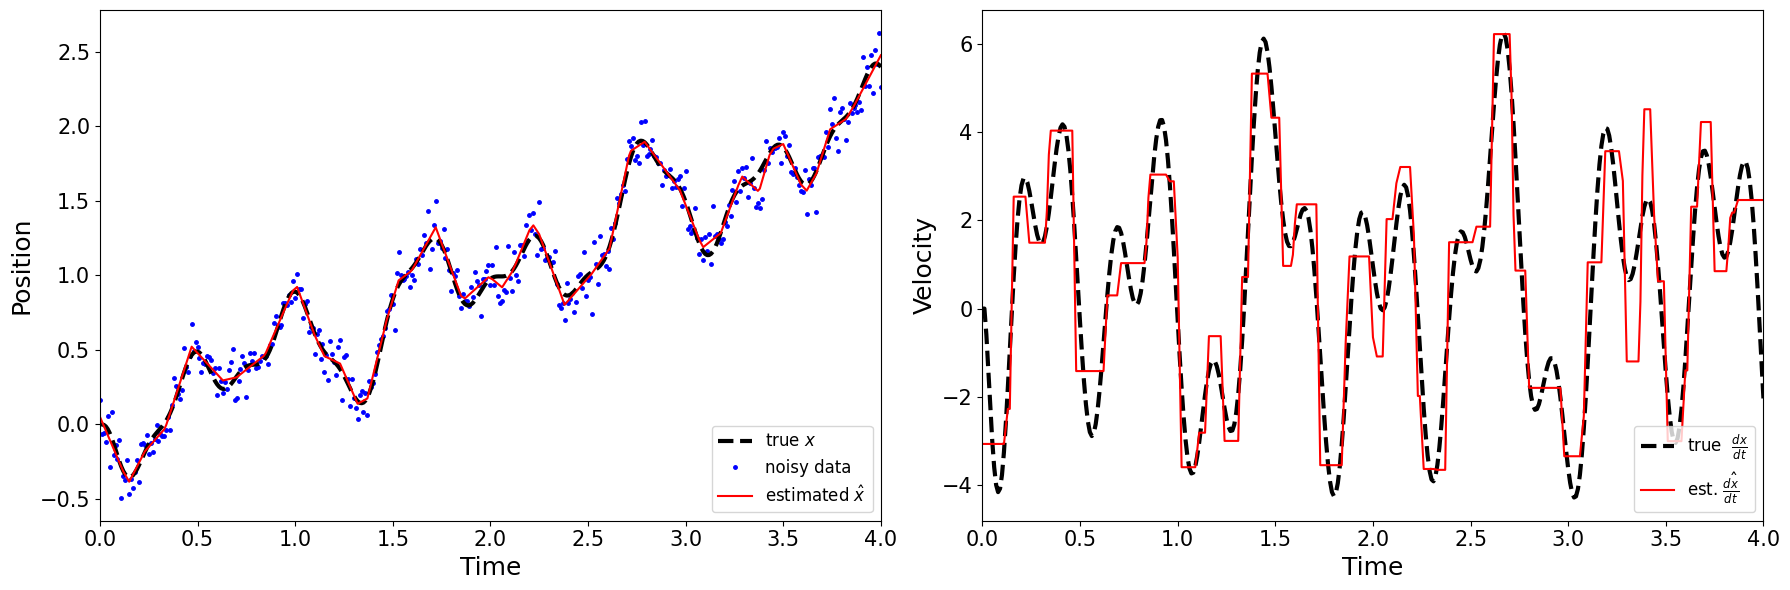

In [17]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, gamma=1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Convex Total Variation Regularization: regularize acceleration

RMS error in velocity:  0.9386085041215947
Error correlation:  0.0036909417240011374


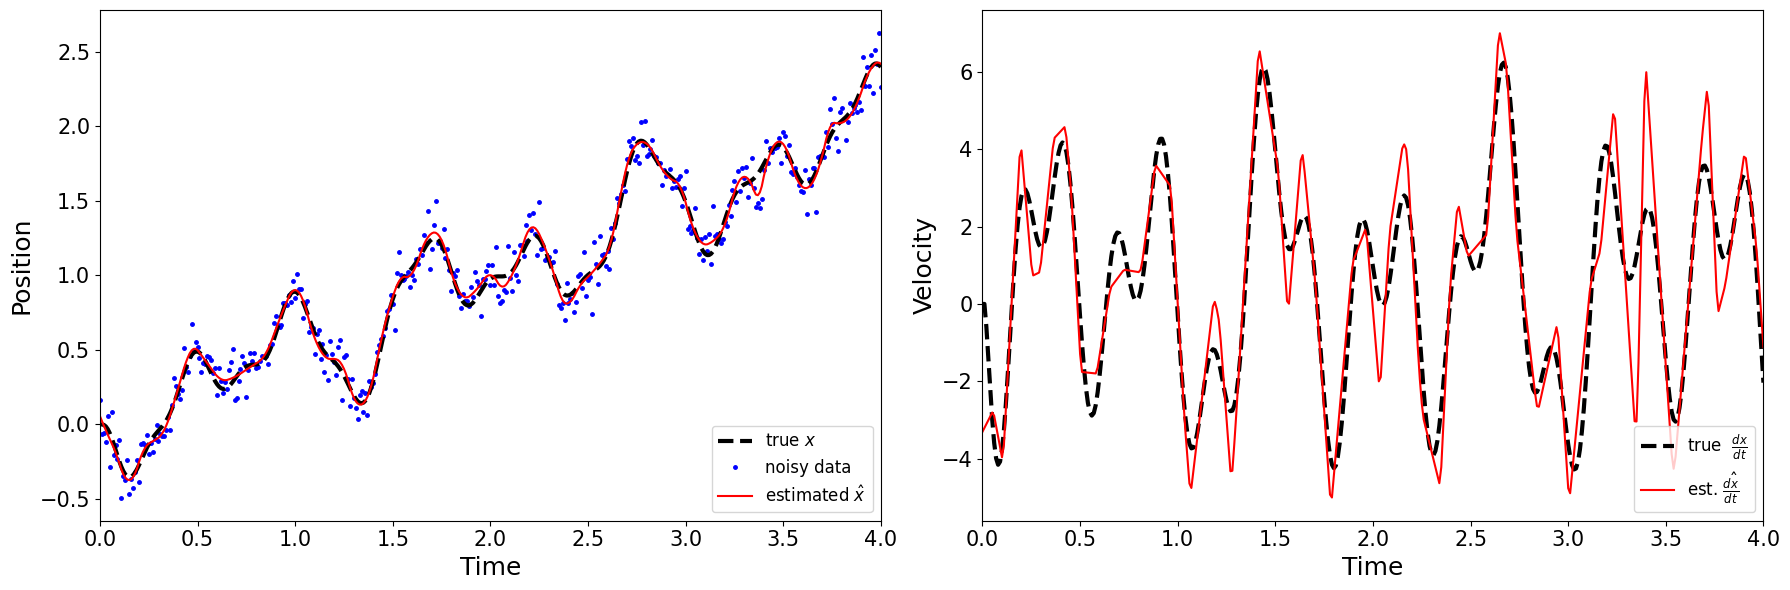

In [18]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, gamma=1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.4  Convex Total Variation Regularization: regularize jerk

RMS error in velocity:  0.6319187180430262
Error correlation:  0.0019146250172051957


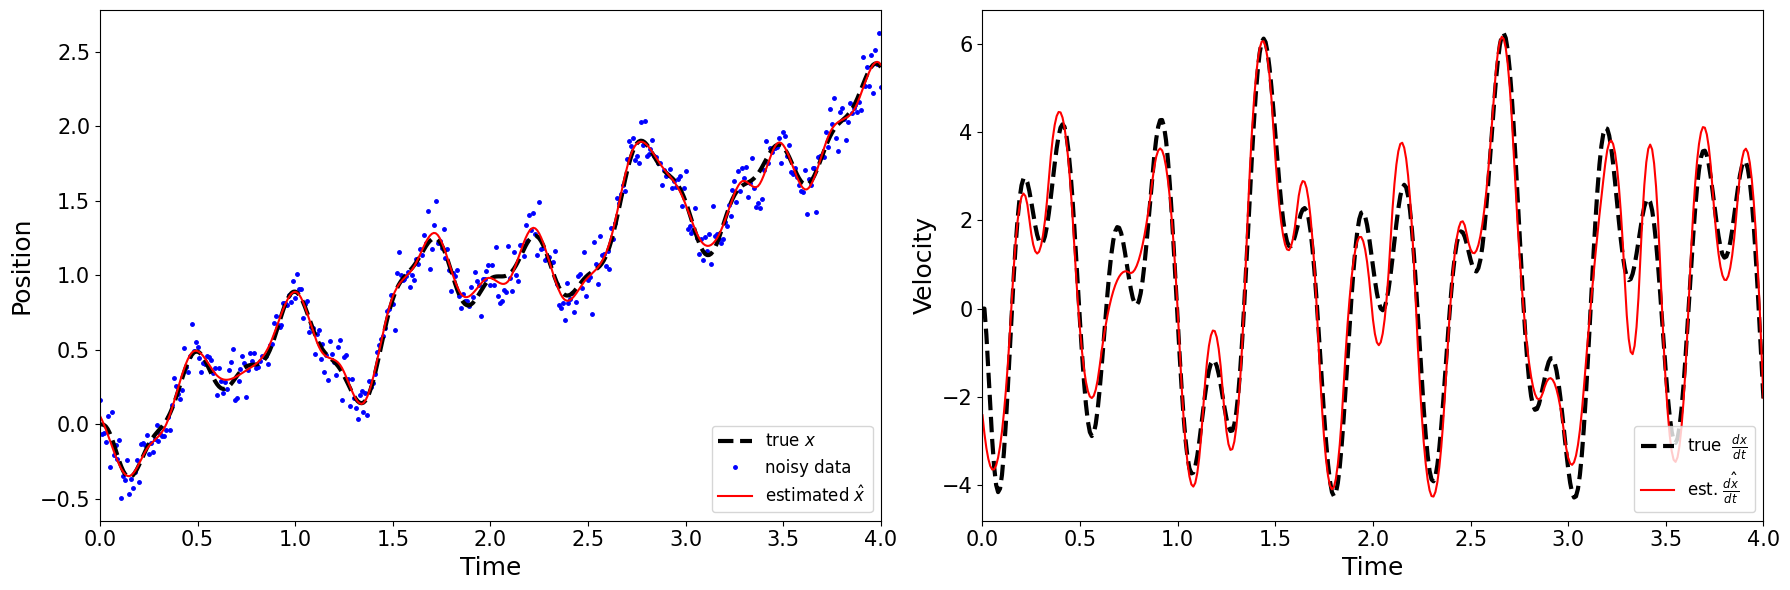

In [19]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, gamma=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

In [20]:
# _, dxdt_hat1 = pynumdiff.total_variation_regularization.velocity(x, dt, gamma=2)
# _, dxdt_hat2 = pynumdiff.total_variation_regularization.acceleration(x, dt, gamma=5)
# _, dxdt_hat3 = pynumdiff.total_variation_regularization.jerk(x, dt, gamma=10)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, rf'regularized $1^\text{{st}}$ deriv.; $\gamma=2$',
#                           dxdt_hat2, rf"regularized $2^\text{{nd}}$ deriv.; $\gamma=5$",
#                           dxdt_hat3, rf'regularized $3^\text{{rd}}$ deriv.; $\gamma=10$')

### 3.5 Convex Total Variation Regularization: regularize acceleration with gaussian smoothing

RMS error in velocity:  0.7779066731647621
Error correlation:  0.0023699054852437287


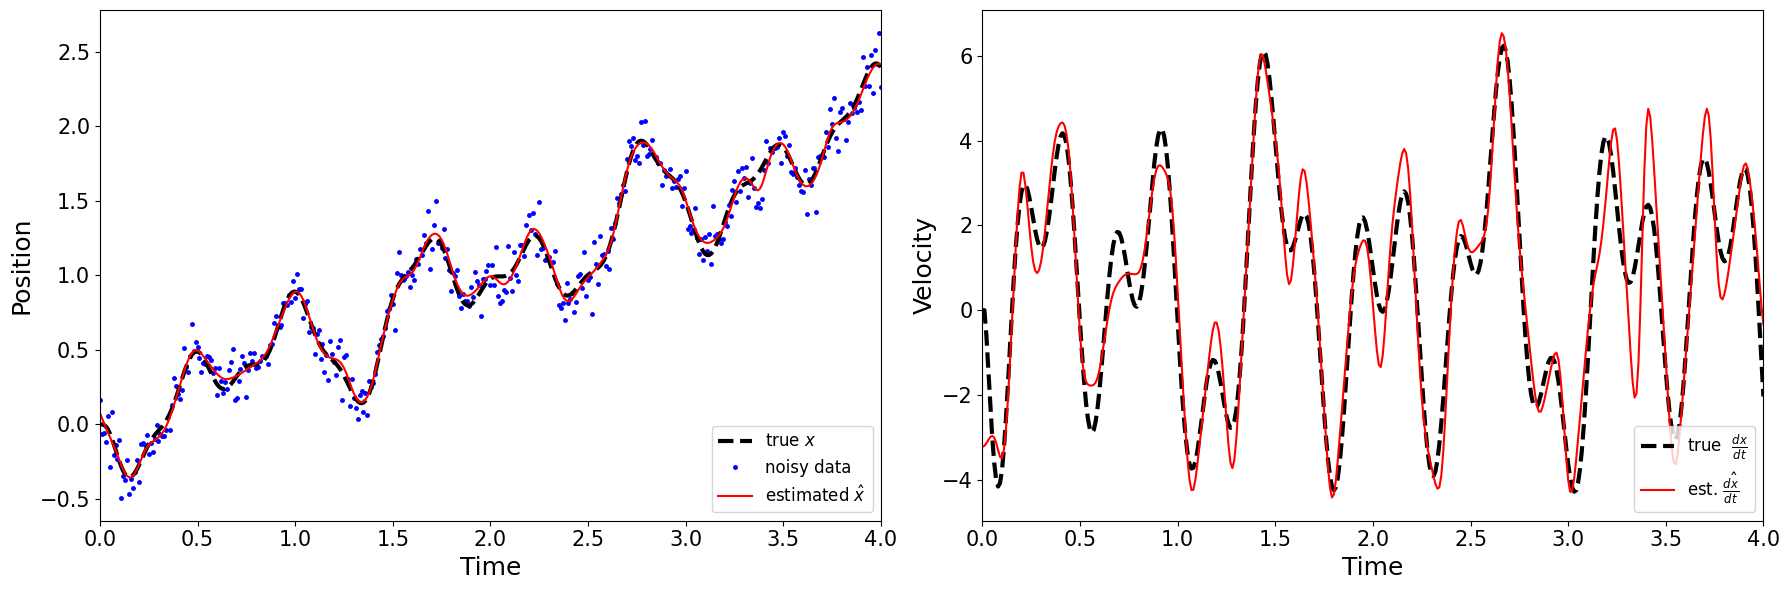

In [21]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, gamma=1, window_size=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.6 Convex Total Variation Regularization: regularize jerk in a sliding window

RMS error in velocity:  0.8932661325707255
Error correlation:  0.0061137850713498445


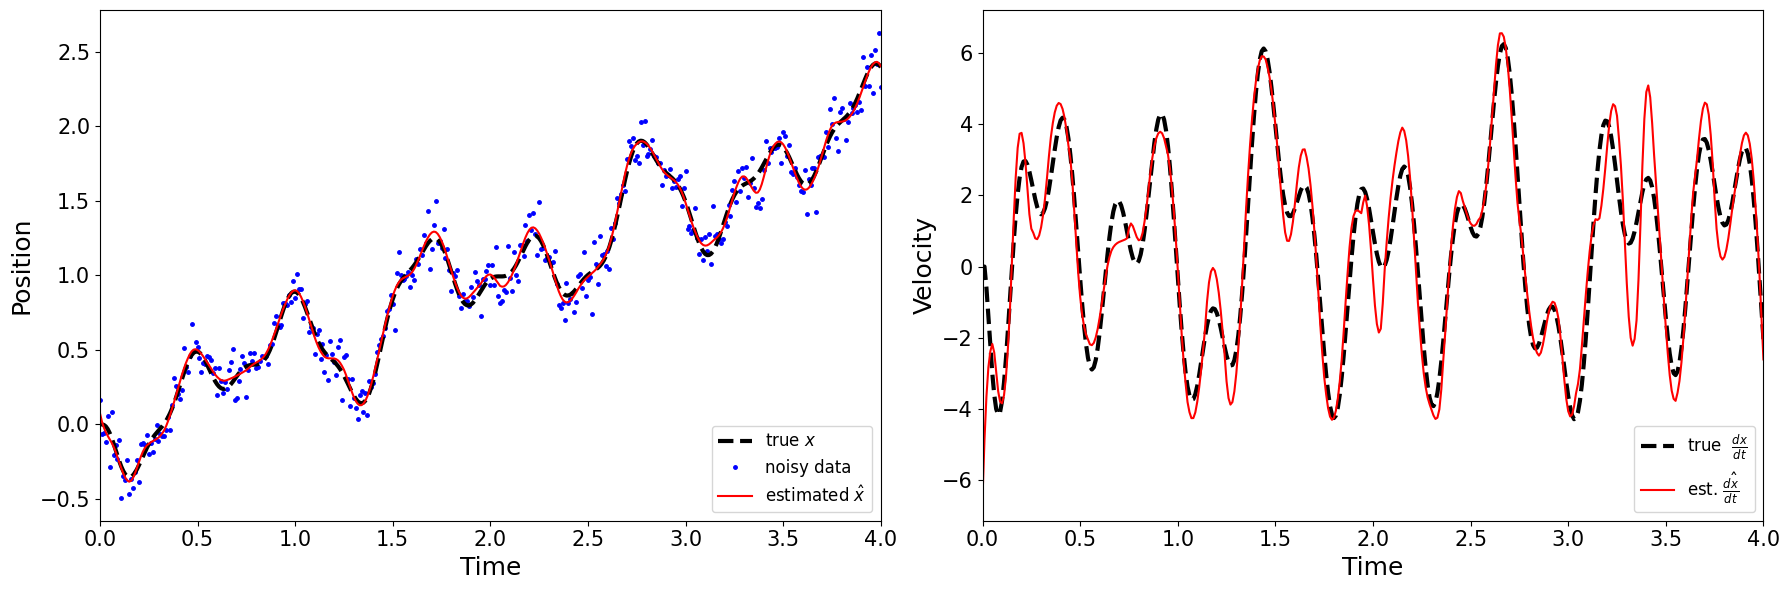

In [22]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk_sliding(x, dt, gamma=10, window_size=51)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 4. Linear Models

### 4.1 Linear Models: Spectral derivative

RMS error in velocity:  0.6655949670179002
Error correlation:  0.0146115278085926


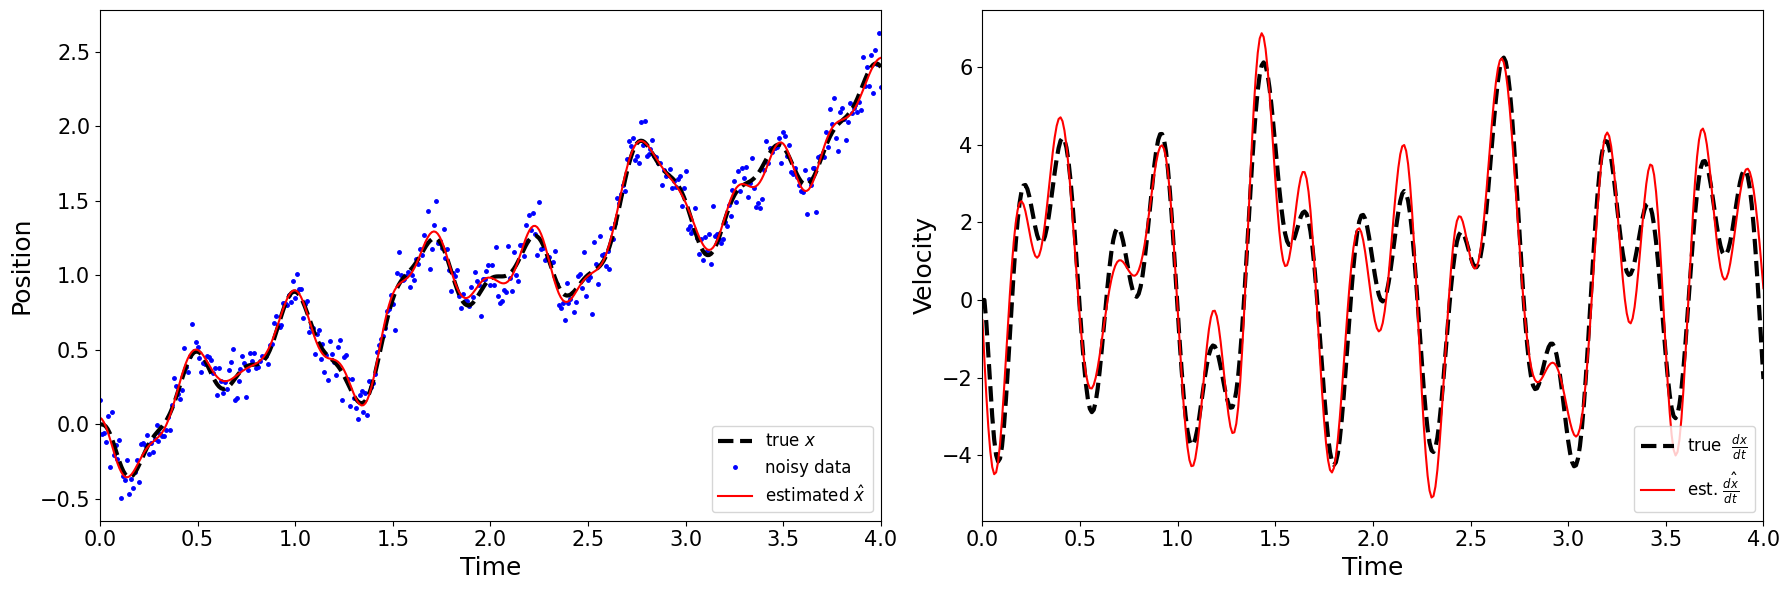

In [23]:
import pynumdiff.linear_model


x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=True, pad_to_zero_dxdt=False, high_freq_cutoff=0.1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=False, pad_to_zero_dxdt=False, high_freq_cutoff=0.1)
# _, dxdt_hat2 = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=False, pad_to_zero_dxdt=True, high_freq_cutoff=0.1)
# _, dxdt_hat3 = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=True, pad_to_zero_dxdt=False, high_freq_cutoff=0.1)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'even_ext=False, pad_len=0, cutoff=0.1 Nyquist',
#                            dxdt_hat2, 'even_ext=False, pad_len=100, cutoff=0.1 Nyquist',
#                            dxdt_hat3, 'even_ext=True, pad_len=0, cutoff=0.1 Nyquist')

### 4.2 Linear Models: Sliding polynomial fit

RMS error in velocity:  0.8715805815814723
Error correlation:  0.02209867453652464


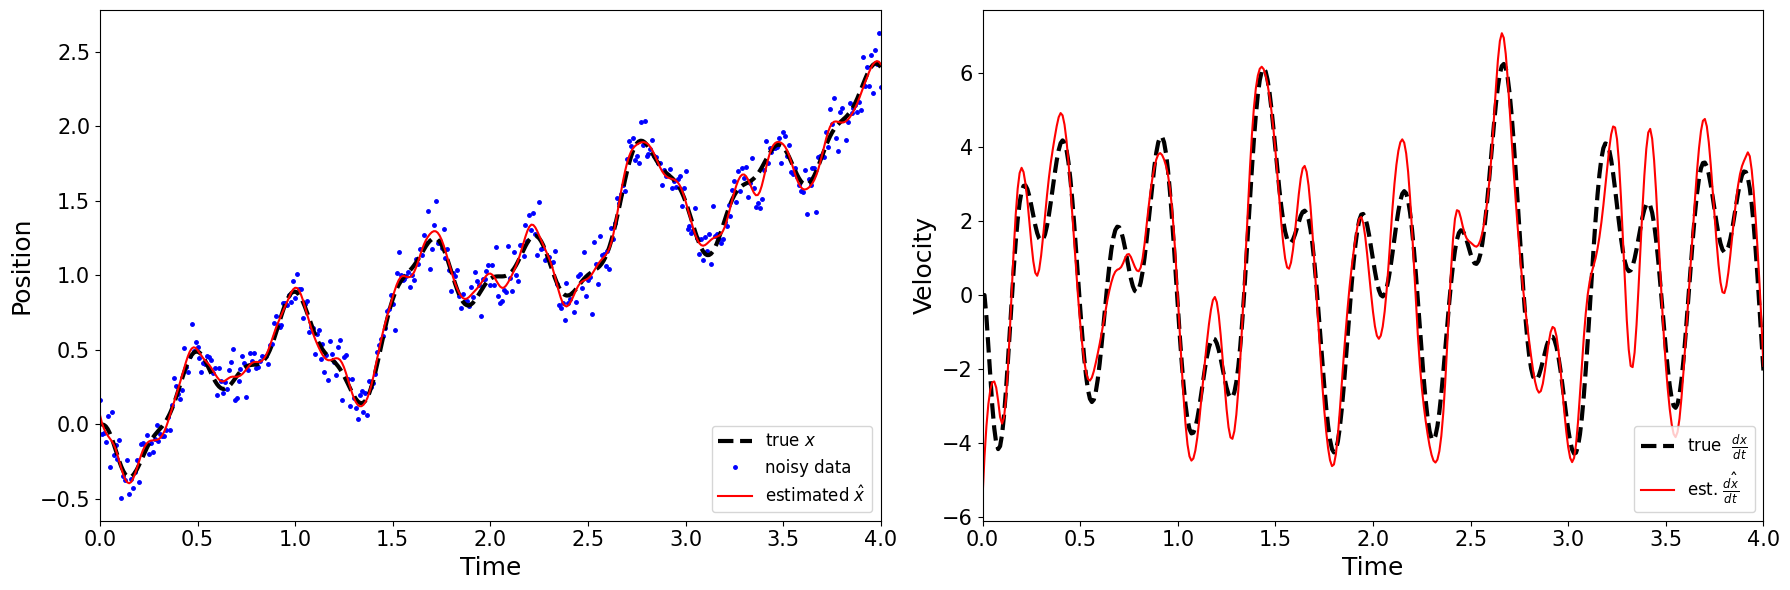

In [24]:
x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, poly_order=2, window_size=21)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.linear_model.polydiff(x, dt, poly_order=2, kernel='friedrichs', window_size=40, step_size=1)
# _, dxdt_hat2 = pynumdiff.linear_model.polydiff(x, dt, poly_order=3, kernel='friedrichs', window_size=40, step_size=5)
# _, dxdt_hat3 = pynumdiff.linear_model.polydiff(x, dt, poly_order=3, kernel='gaussian', window_size=40, step_size=5)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, "poly_order=2, kernel='friedrichs',\nwindow_size=40, step_size=1",
#                          dxdt_hat2, "poly_order=3, kernel='friedrichs',\nwindow_size=40, step_size=5",
#                          dxdt_hat3, "poly_order=3, kernel='gaussian',\nwindow_size=40, step_size=5")

### 4.3 Linear Models: Savitzky-Golay filter

/Users/pavel/Code/PyNumDiff/pynumdiff/linear_model/_linear_model.py:43: UserWarning: Kernel window size should be odd. Added 1 to length.
  warn("Kernel window size should be odd. Added 1 to length.")


RMS error in velocity:  0.7838243617073721
Error correlation:  0.054293522523663026


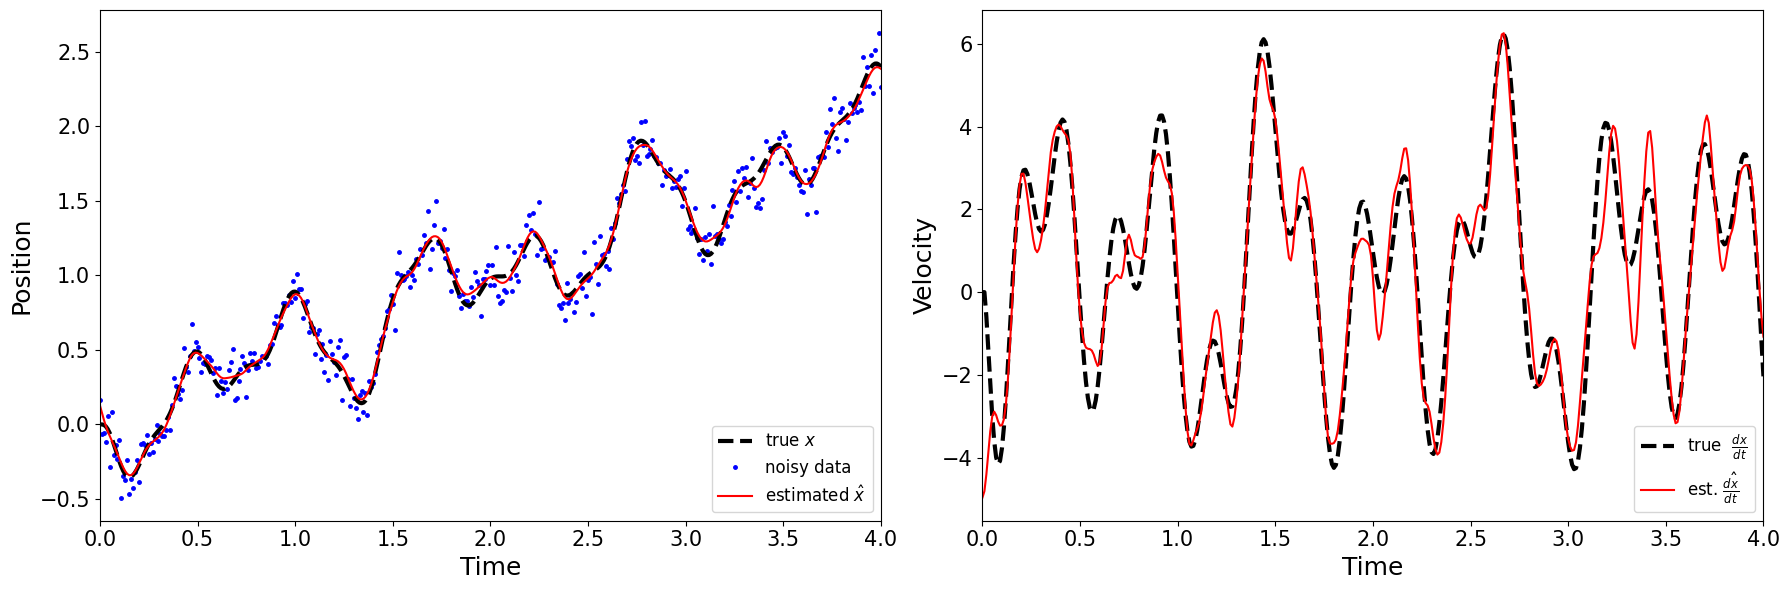

In [25]:
x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, poly_order=2, window_size=10, smoothing_win=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# _, dxdt_hat1 = pynumdiff.linear_model.savgoldiff(x, dt, poly_order=3, window_size=25, smoothing_win=3)
# _, dxdt_hat2 = pynumdiff.linear_model.savgoldiff(x, dt, poly_order=3, window_size=25, smoothing_win=11)
# _, dxdt_hat3 = pynumdiff.linear_model.savgoldiff(x, dt, poly_order=5, window_size=35, smoothing_win=11)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, "poly_order=3, window_size=25, smoothing_win=3",
#                          dxdt_hat2, "poly_order=3, window_size=25, smoothing_win=11",
#                          dxdt_hat3, "poly_order=5, window_size=35, smoothing_win=11")

### 4.5 Linear Models: Sliding linear time invariant system fit

/usr/local/lib/python3.13/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


RMS error in velocity:  1.2048191808715742
Error correlation:  0.32805361487814017


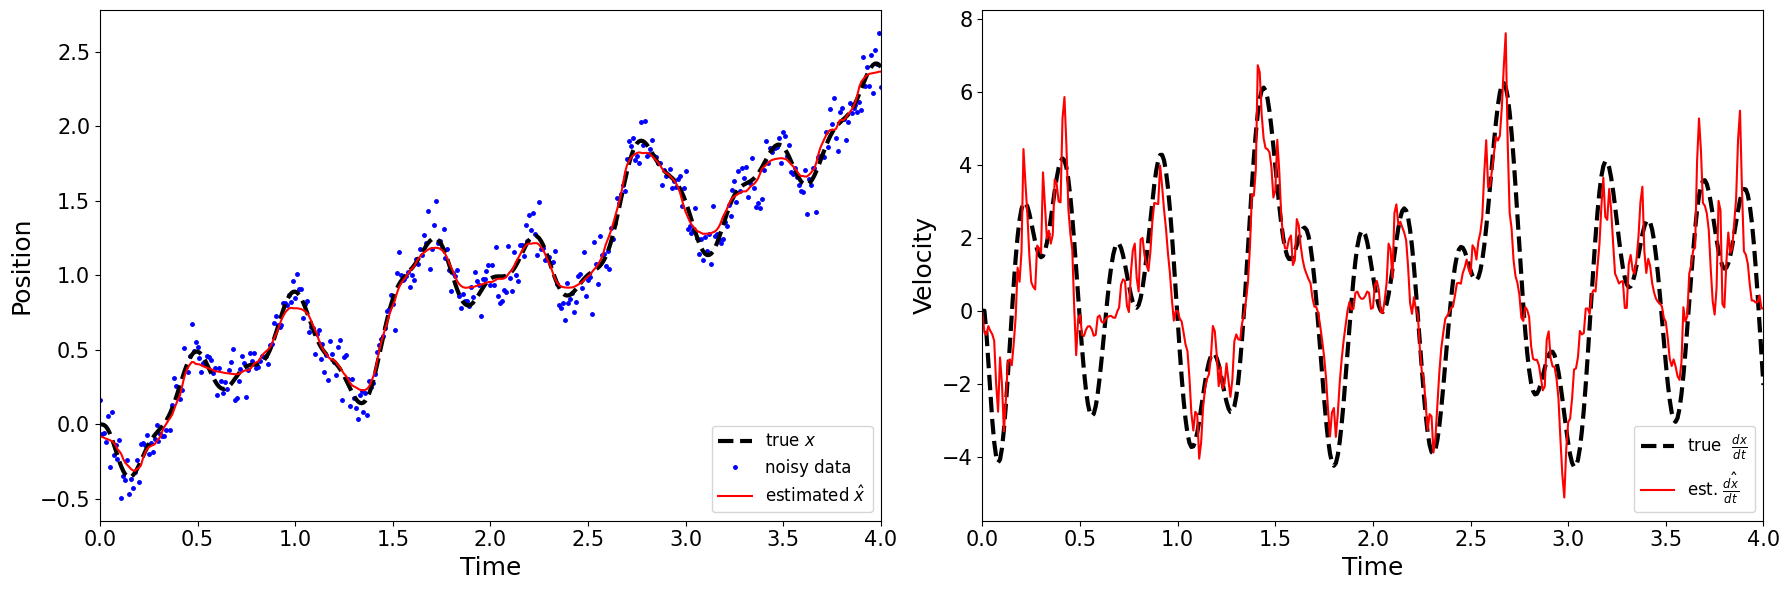

In [26]:
x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, order=3, gamma=10, window_size=21)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

RMS error in velocity:  0.6728004818740781
Error correlation:  0.08695230747860534


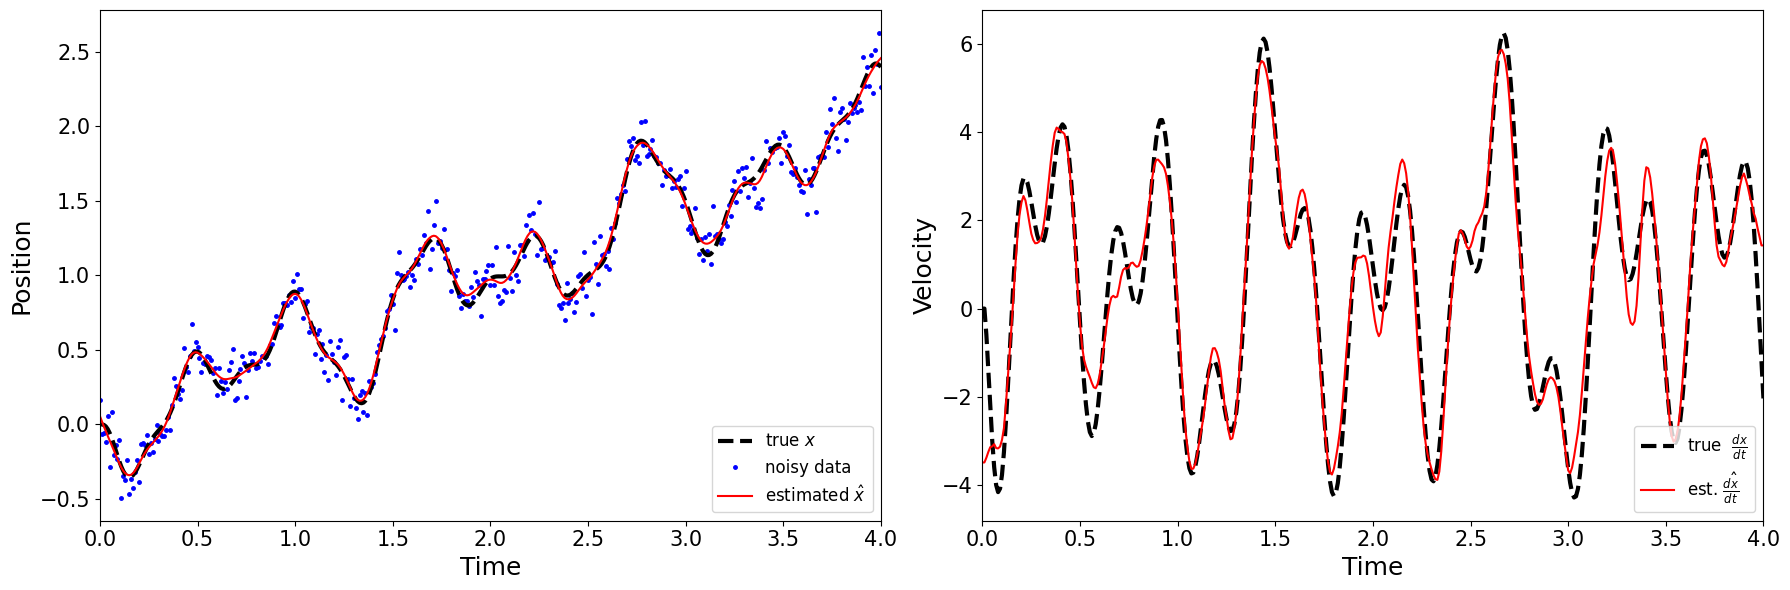

In [27]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity(x, dt, r=noise_parameters[1]**2, q=1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

RMS error in velocity:  0.6285833671294723
Error correlation:  0.02219257376919108


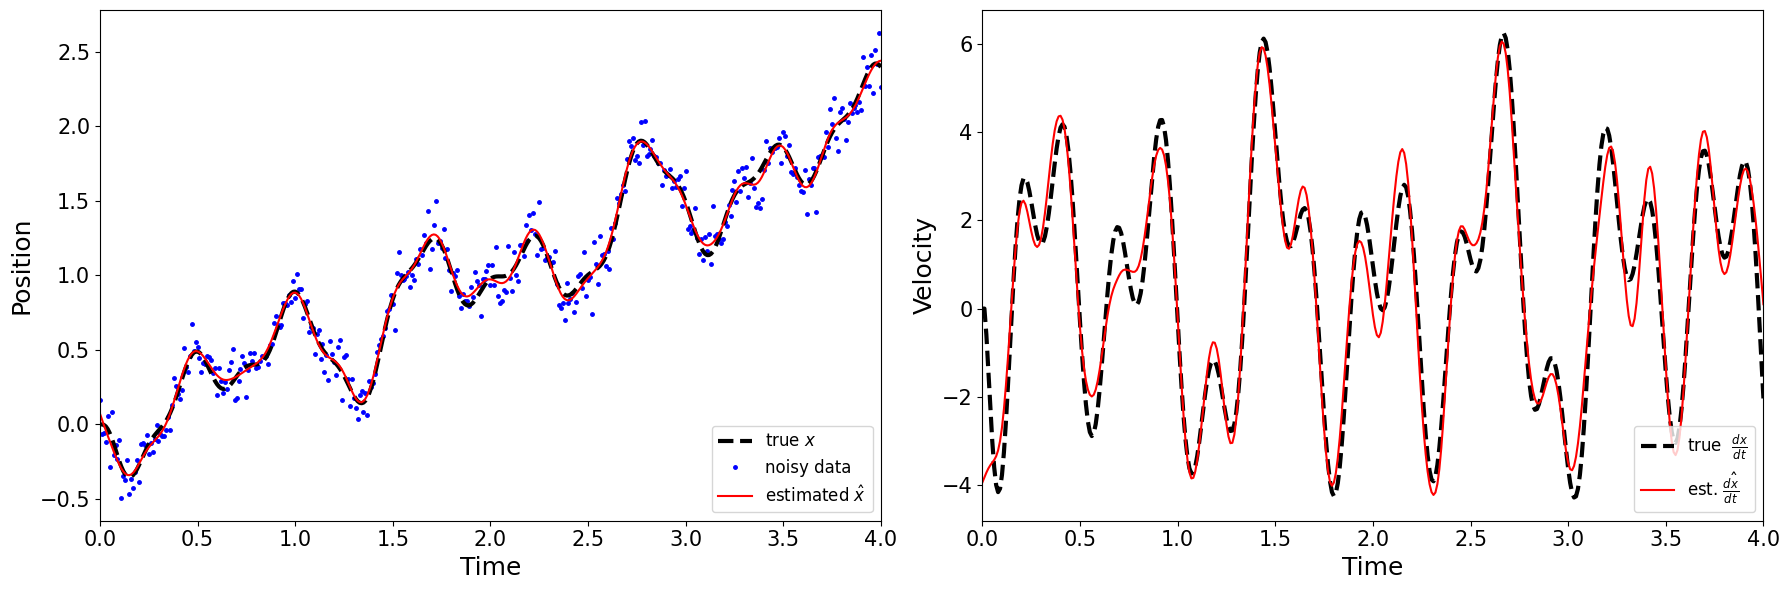

In [28]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, r=noise_parameters[1]**2, q=1e3)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.3 Kalman smoothing: constant jerk (forward-backward)

RMS error in velocity:  0.561434641861417
Error correlation:  0.00168725778102893


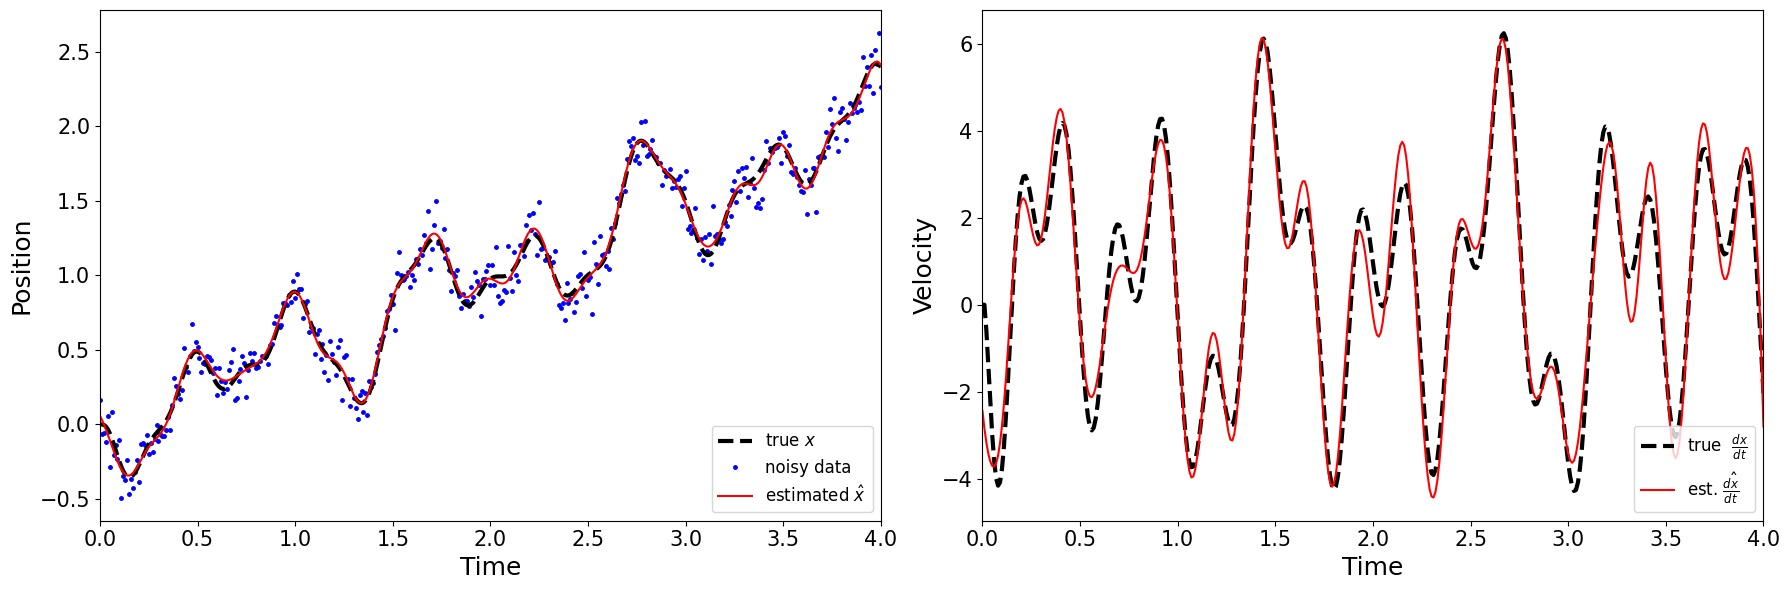

In [29]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, r=noise_parameters[1]**2, q=1e6)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

In [30]:
# _, dxdt_hat1 = pynumdiff.kalman_smooth.constant_velocity(x, dt, forwardbackward=False, q=1, r=0.01)
# _, dxdt_hat2 = pynumdiff.kalman_smooth.constant_acceleration(x, dt, forwardbackward=False, q=100, r=0.001)
# _, dxdt_hat3 = pynumdiff.kalman_smooth.constant_jerk(x, dt, forwardbackward=False, q=1e4, r=0.0001)

# evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, rf'constant velocity; $q=1$, $r=0.01$',
#                           dxdt_hat2, rf"constant acceleration; $q=100$, $r=0.001$",
#                           dxdt_hat3, rf'constant jerk; $q=1\text{{e}}4$, $r=0.0001$')